# Case Study
Let's proceed with the Heart Attack Analysis & Prediction Dataset.csv Dataset and apply the same classification methods we used before, including Nearest Neighbors (KNN), Decision Trees, SVM, Naive Bayes, and Logistic Regression. We will explore each method with different hyperparameters and summarize their performance in terms of accuracy. At the end, we will visualize the results for comparison.

The Wine Dataset is a popular dataset for classification tasks, where the target class represents the origin of different wines. It contains 13 features that describe various properties of the wines.



## Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [4]:
df = pd.read_csv("Heart Attack Analysis & Prediction Dataset.csv", delimiter=',')
nRow, nCol = df.shape

print(f'There are {nRow} rows and {nCol} columns')

There are 303 rows and 14 columns


## Exploratory Analysis

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
print(df.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [9]:
print(df.describe(include='all'))

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Split Features and Target

### Features

In [13]:
X = df.iloc[:, :-1]
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Target

In [12]:
y = df['output']
y.head()

,output
0,1
1,1
2,1
3,1
4,1


## Split the dataset into training and testing sets (80% train, 20% test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apply Nearest Neighbors (KNN) with different values of k.

In [15]:
# Create a list of k values
k_values = range(1, 51, 4)

# Create an empty dictionary to store the results
knn_results = {}

# Train KNN models with different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_results[k] = accuracy


## Apply Decision Trees with different values of max depth.

In [16]:
# Create a list of max depth values
max_depth_values = range(1, 21, 2)

# Create an empty dictionary to store the results
dt_results = {}

# Train Decision Tree models with different max depth values
for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    dt_results[max_depth] = accuracy


##  Apply SVM with different values of C.

In [17]:
# Create a list of C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 200]

# Create an empty dictionary to store the results
svm_results = {}

# Train SVM models with different C values
for C in C_values:
    svm_model = SVC(C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_results[C] = accuracy


## Apply Naive Bayes (GaussianNB).

In [18]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)


## Apply Logistic Regression with different values of C.

In [19]:
# Create an empty dictionary to store the results
logreg_results = {}

# Train Logistic Regression models with different C values
for C in C_values:
    lr_model = LogisticRegression(C=C, random_state=42)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logreg_results[C] = accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Summarize the performance of each method in terms of accuracy.

In [20]:
# Print the results of each method
print("Results of Classification Methods:")
print("KNN:")
for k, accuracy in knn_results.items():
    print(f"k = {k}, Accuracy: {accuracy:.2f}")

print("\nDecision Trees:")
for max_depth, accuracy in dt_results.items():
    print(f"Max Depth = {max_depth}, Accuracy: {accuracy:.2f}")

print("\nSVM:")
for C, accuracy in svm_results.items():
    print(f"C = {C}, Accuracy: {accuracy:.2f}")

print("\nNaive Bayes:")
print(f"Accuracy: {nb_accuracy:.2f}")

print("\nLogistic Regression:")
for C, accuracy in logreg_results.items():
    print(f"C = {C}, Accuracy: {accuracy:.2f}")


Results of Classification Methods:
KNN:
k = 1, Accuracy: 0.62
k = 5, Accuracy: 0.69
k = 9, Accuracy: 0.69
k = 13, Accuracy: 0.74
k = 17, Accuracy: 0.69
k = 21, Accuracy: 0.70
k = 25, Accuracy: 0.70
k = 29, Accuracy: 0.72
k = 33, Accuracy: 0.70
k = 37, Accuracy: 0.69
k = 41, Accuracy: 0.72
k = 45, Accuracy: 0.69
k = 49, Accuracy: 0.70

Decision Trees:
Max Depth = 1, Accuracy: 0.84
Max Depth = 3, Accuracy: 0.82
Max Depth = 5, Accuracy: 0.84
Max Depth = 7, Accuracy: 0.85
Max Depth = 9, Accuracy: 0.85
Max Depth = 11, Accuracy: 0.84
Max Depth = 13, Accuracy: 0.79
Max Depth = 15, Accuracy: 0.82
Max Depth = 17, Accuracy: 0.82
Max Depth = 19, Accuracy: 0.84

SVM:
C = 0.001, Accuracy: 0.52
C = 0.01, Accuracy: 0.52
C = 0.1, Accuracy: 0.52
C = 1, Accuracy: 0.70
C = 10, Accuracy: 0.77
C = 100, Accuracy: 0.84
C = 200, Accuracy: 0.87

Naive Bayes:
Accuracy: 0.87

Logistic Regression:
C = 0.001, Accuracy: 0.82
C = 0.01, Accuracy: 0.84
C = 0.1, Accuracy: 0.89
C = 1, Accuracy: 0.89
C = 10, Accuracy: 0.

## Visualize the accuracy for each method.

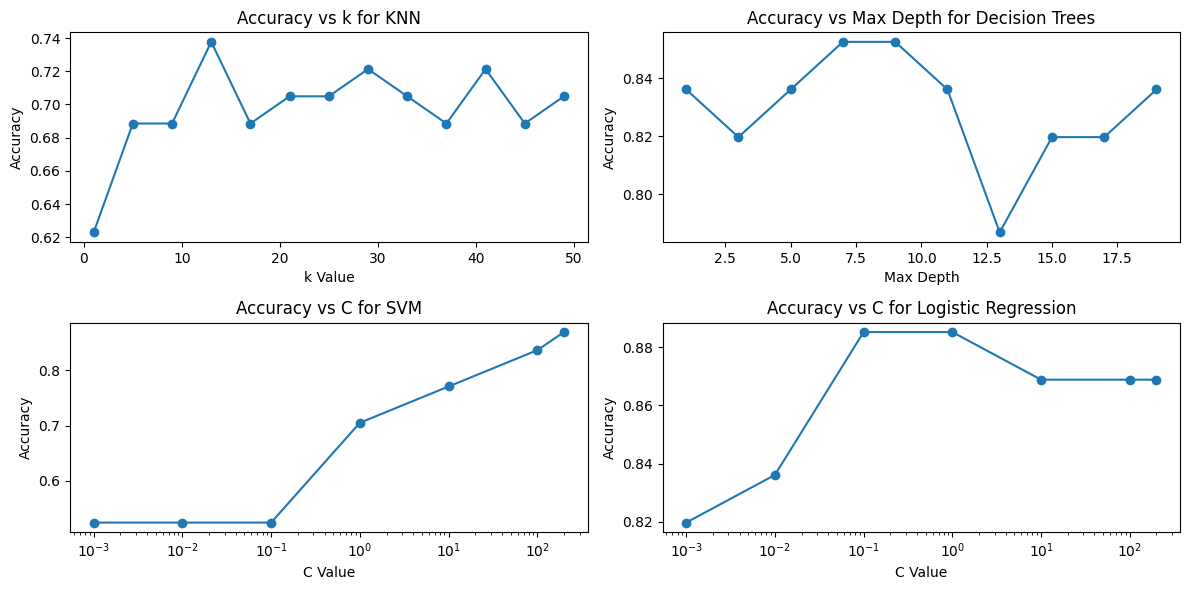

In [21]:
# Visualize the accuracy vs hyperparameter for each method
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(list(knn_results.keys()), list(knn_results.values()), marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN')

plt.subplot(2, 2, 2)
plt.plot(list(dt_results.keys()), list(dt_results.values()), marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Trees')

plt.subplot(2, 2, 3)
plt.plot(C_values, list(svm_results.values()), marker='o')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for SVM')

plt.subplot(2, 2, 4)
plt.plot(C_values, list(logreg_results.values()), marker='o')
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for Logistic Regression')

plt.tight_layout()
plt.show()